In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
datetime.datetime.strptime
from matplotlib.colors import LinearSegmentedColormap

# https://usbrandcolors.com/airbnb-colors/

# Data Wrangling

1. Data from 2018 extracted on 2018-04-12
2. Data from 2019 extracted on 2019-04-11
3. Data from 2020 extracted on 2020-04-17

In [2]:
lst18 = pd.read_csv("2018/listings18.zip", compression='zip', dtype={"id":object, "host_id":object,"zipcode": object, 
                                                "price":object , "weekly_price": object, "monthly_price": object})
lst18['retrieved_date'] = pd.to_datetime('20180412', format='%Y%m%d', errors='ignore')

lst19 = pd.read_csv("2019/listings19.zip", compression='zip', dtype={"id":object, "host_id":object,"zipcode": object, 
                                                "price":object , "weekly_price": object, "monthly_price": object})
lst19['retrieved_date'] = pd.to_datetime('20190411', format='%Y%m%d', errors='ignore')

lst20 = pd.read_csv("2020/listings20.zip", compression='zip', dtype={"id":object, "host_id":object,"zipcode": object, 
                                                "price":object , "weekly_price": object, "monthly_price": object})
lst20['retrieved_date'] = pd.to_datetime('20200417', format='%Y%m%d', errors='ignore')

In [3]:
lst18.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,retrieved_date
0,1742289,https://www.airbnb.com/rooms/1742289,20180412035726,2018-04-12,ESTUDIO EN MADRID DE LOS AUSTRIAS,PEQUEÑO ESTUDIO CON INMEJORABLE UBICACIÓN. EN...,Estudio en un ambiente con cuarto de baño inde...,PEQUEÑO ESTUDIO CON INMEJORABLE UBICACIÓN. EN...,none,El vecindario si bien esta en pleno centro de ...,...,NaN,NaN,t,f,strict,f,f,1,1.78,2018-04-12


In [4]:
lst19.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,retrieved_date
0,6369,https://www.airbnb.com/rooms/6369,20190411154233,2019-04-11,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,...,f,flexible,f,f,1,0,1,0,0.56,2019-04-11


In [5]:
lst20.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,retrieved_date
0,6369,https://www.airbnb.com/rooms/6369,20200417153609,2020-04-18,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,none,Nice and definitely non touristic neighborhoo...,...,f,flexible,f,f,1,0,1,0,0.61,2020-04-17


In [6]:
# Convert data type the dates

lst18.loc[:,'host_since'] = pd.to_datetime(lst18.loc[:,'host_since'])
lst19.loc[:,'host_since'] = pd.to_datetime(lst19.loc[:,'host_since'])
lst20.loc[:,'host_since'] = pd.to_datetime(lst20.loc[:,'host_since'])

lst18.loc[:,'last_review'] = pd.to_datetime(lst18.loc[:,'last_review'])
lst19.loc[:,'last_review'] = pd.to_datetime(lst19.loc[:,'last_review'])
lst20.loc[:,'last_review'] = pd.to_datetime(lst20.loc[:,'last_review'])

In [7]:
lst18_red = lst18[['id','zipcode','property_type','room_type','price','neighbourhood_group_cleansed'
                   ,'listing_url','last_review','reviews_per_month','host_id','host_since','retrieved_date'
                   ,'availability_365']]
lst18_red.head(1)

,id,zipcode,property_type,room_type,price,neighbourhood_group_cleansed,listing_url,last_review,reviews_per_month,host_id,host_since,retrieved_date,availability_365
0,1742289,28005,Apartment,Entire home/apt,$45.00,Centro,https://www.airbnb.com/rooms/1742289,2018-02-09,1.78,9172209,2013-10-01,2018-04-12,307


In [8]:
# Data Types Check

lst18_red.dtypes

id                                      object
zipcode                                 object
property_type                           object
room_type                               object
price                                   object
neighbourhood_group_cleansed            object
listing_url                             object
last_review                     datetime64[ns]
reviews_per_month                      float64
host_id                                 object
host_since                      datetime64[ns]
retrieved_date                  datetime64[ns]
availability_365                         int64
dtype: object

In [9]:
# Top recent enrollment dates.

lst18_red.groupby("host_since")["host_since"].count().reset_index(name="count").sort_values(["host_since"], ascending=False).head(7)

,host_since,count
2394,2018-04-11,2
2393,2018-04-10,5
2392,2018-04-09,2
2391,2018-04-08,3
2390,2018-04-07,17
2389,2018-04-06,4
2388,2018-04-05,3


In [10]:
lst19_red = lst19[['id','zipcode','property_type','room_type','price','neighbourhood_group_cleansed'
                   ,'listing_url','last_review','reviews_per_month','host_id','host_since','retrieved_date'
                   ,'availability_365']]
lst19_red.head(1)

,id,zipcode,property_type,room_type,price,neighbourhood_group_cleansed,listing_url,last_review,reviews_per_month,host_id,host_since,retrieved_date,availability_365
0,6369,28016,Apartment,Private room,$70.00,Chamartín,https://www.airbnb.com/rooms/6369,2019-03-23,0.56,13660,2009-04-16,2019-04-11,75


In [11]:
# Data Types Check

lst19_red.dtypes

id                                      object
zipcode                                 object
property_type                           object
room_type                               object
price                                   object
neighbourhood_group_cleansed            object
listing_url                             object
last_review                     datetime64[ns]
reviews_per_month                      float64
host_id                                 object
host_since                      datetime64[ns]
retrieved_date                  datetime64[ns]
availability_365                         int64
dtype: object

In [12]:
# Top recent enrollment dates.

lst19_red.groupby("host_since")["host_since"].count().reset_index(name="count").sort_values(["host_since"], ascending=False).head(7)

,host_since,count
2663,2019-04-10,3
2662,2019-04-09,10
2661,2019-04-08,13
2660,2019-04-07,12
2659,2019-04-06,5
2658,2019-04-05,9
2657,2019-04-04,3


In [13]:
lst20_red = lst20[['id','zipcode','property_type','room_type','price','neighbourhood_group_cleansed'
                   ,'listing_url','last_review','reviews_per_month','host_id','host_since','retrieved_date'
                   ,'availability_365']]
lst20_red.head(1)

,id,zipcode,property_type,room_type,price,neighbourhood_group_cleansed,listing_url,last_review,reviews_per_month,host_id,host_since,retrieved_date,availability_365
0,6369,28016,Apartment,Private room,$70.00,Chamartín,https://www.airbnb.com/rooms/6369,2020-02-29,0.61,13660,2009-04-16,2020-04-17,90


In [14]:
# Data Types Check

lst20_red.dtypes

id                                      object
zipcode                                 object
property_type                           object
room_type                               object
price                                   object
neighbourhood_group_cleansed            object
listing_url                             object
last_review                     datetime64[ns]
reviews_per_month                      float64
host_id                                 object
host_since                      datetime64[ns]
retrieved_date                  datetime64[ns]
availability_365                         int64
dtype: object

In [15]:
# Top recent enrollment dates.

lst20_red.groupby("host_since")["host_since"].count().reset_index(name="count").sort_values(["host_since"], ascending=False).head(7)

,host_since,count
3033,2020-04-16,1
3032,2020-04-15,1
3031,2020-04-14,2
3030,2020-04-10,1
3029,2020-04-09,1
3028,2020-04-08,1
3027,2020-04-07,1


## Normalize Periods

Since the data will be compared in similar periods, data is normalized for covering the same max enrollment month and date for either 2018, 2019 and 2020 data. In this case the common month and date for either data frame is the 10th of April.

In [16]:
lst18_red.host_since.isnull().value_counts()

False    16995
True        13
Name: host_since, dtype: int64

In [17]:
lst19_red.host_since.isnull().value_counts()

False    17717
True         4
Name: host_since, dtype: int64

In [18]:
lst20_red.host_since.isnull().value_counts()

False    21787
True         4
Name: host_since, dtype: int64

In [19]:
# Host IDs and Property IDs with no host_id 

lst18_red[lst18_red.host_since.isnull()][['host_id','id']].\
    merge(lst19_red[['host_id','id']][lst19_red.host_since.isnull()],on=['host_id','id'],how='outer',indicator=True).\
    rename(columns={'_merge':"merge_1819"}).\
    merge(lst20_red[['host_id','id']][lst20_red.host_since.isnull()],on=['host_id','id'],how='outer',indicator=True).\
    rename(columns={'_merge':"merge_181920"})

,host_id,id,merge_1819,merge_181920
0,44939562,9234402,left_only,left_only
1,44939562,8536053,left_only,left_only
2,23322740,7878252,left_only,left_only
3,106532211,16286152,left_only,left_only
4,48992339,20273611,left_only,left_only
5,40516896,7712666,both,both
6,48992339,9808033,left_only,left_only
7,36068881,6899113,both,both
8,1964576,392823,left_only,left_only
9,46845753,8963605,both,both


In [20]:
# Since data normalization is needed for comparing data, null registers will be filtered

# Get the minimum day and month from the maximum date of enrollment of each dataframe.

listMaxEnrollmenteDates = []
listMaxEnrollmenteDates.append(lst18_red.host_since.max())
listMaxEnrollmenteDates.append(lst19_red.host_since.max())
listMaxEnrollmenteDates.append(lst20_red.host_since.max())

def minDay(timestamps):
    '''
    INPUT:
    timestamps - List of timestamps
    
    OUTPUT:
    maxDay - Min day from the list of timestamos
    '''
    minDay = 0
    
    for i in timestamps:
        if minDay == 0:
            minDay = i.day
        elif i.day < minDay:
            minDay = i.day
        else:
            continue
    return minDay

def minMonth(timestamps):
    '''
    INPUT:
    timestamps - List of timestamps
    
    OUTPUT:
    maxDay - Min month from the list of timestamos
    '''
    minMonth = 0
    
    for i in timestamps:
        if minMonth == 0:
            minMonth = i.month
        elif i.month < minMonth:
            minMonth = i.month
        else:
            continue
    return minMonth

In [21]:
# Filter Data frames based of the minimum day and month of the three data frames.

minDay = minDay(listMaxEnrollmenteDates)
minMonth = minMonth(listMaxEnrollmenteDates)

def normalizedPeriods(df):
    '''
    INPUT:
    df - original dataframe
    
    OUTPUT:
    df - dataframe with the normalized period
    '''
    df = df[df['host_since'].notnull()]
    maxYear = df.host_since.max().year
    df = df[(df["host_since"]) <= 
        pd.to_datetime('%s%s%s'% (maxYear,str(minMonth).rjust(2, '0'),str(minDay).rjust(2, '0'))
                          , format='%Y%m%d', errors='ignore')]
    return df
    

In [22]:
# Normalized dataframes to its common host since data.

lst18_red = normalizedPeriods(lst18_red)
lst19_red = normalizedPeriods(lst19_red)
lst20_red = normalizedPeriods(lst20_red)

In [23]:
lst18_red.\
    groupby("host_since")["host_since"].\
    count().\
    reset_index(name="count").\
    sort_values(["host_since"], ascending=False).\
    head(7)

,host_since,count
2393,2018-04-10,5
2392,2018-04-09,2
2391,2018-04-08,3
2390,2018-04-07,17
2389,2018-04-06,4
2388,2018-04-05,3
2387,2018-04-04,1


In [24]:
#lst19.head().to_excel("output.xlsx")

## Create Recently Booked Categories

As suggested in the disclaimer, we will use the last review date as a proxy for the recently booked listings.

In [25]:
#lst18_red.apply(lambda x: 1 if x["last_review"]>0 else 0)

def recentlyBooked(df):
    
    sixmonths = df['host_since'].max() - pd.DateOffset(months=6) 
    oneyear = df['host_since'].max() - pd.DateOffset(years=1) 
    
    df['recent_bkg_6m'] = df.last_review.apply(lambda x: 1 if x>=sixmonths else 0)
    df['recent_bkg_1y'] = df.last_review.apply(lambda x: 1 if x>=oneyear else 0)
    
    return df


lst18_red = recentlyBooked(lst18_red)
lst19_red = recentlyBooked(lst19_red)
lst20_red = recentlyBooked(lst20_red)

lst20_red.head()

,id,zipcode,property_type,room_type,price,neighbourhood_group_cleansed,listing_url,last_review,reviews_per_month,host_id,host_since,retrieved_date,availability_365,recent_bkg_6m,recent_bkg_1y
0,6369,28016,Apartment,Private room,$70.00,Chamartín,https://www.airbnb.com/rooms/6369,2020-02-29,0.61,13660,2009-04-16,2020-04-17,90,1,1
1,21853,28047,Apartment,Private room,$30.00,Latina,https://www.airbnb.com/rooms/21853,2018-07-15,0.49,83531,2010-02-21,2020-04-17,260,0,0
2,23001,28045,Apartment,Entire home/apt,$50.00,Arganzuela,https://www.airbnb.com/rooms/23001,NaT,NaN,82175,2010-02-17,2020-04-17,365,0,0
3,24836,28004,Apartment,Entire home/apt,$115.00,Centro,https://www.airbnb.com/rooms/24836,2020-01-26,0.63,101653,2010-03-31,2020-04-17,352,1,1
4,26825,28045,House,Private room,$25.00,Arganzuela,https://www.airbnb.com/rooms/26825,2020-03-12,1.23,114340,2010-04-27,2020-04-17,332,1,1


## Is Airbnb gaining more hosts?

1. recent_booking: Listings with a review in the last six months
2. frequently_booked: Estimated booking days per year

In [26]:
# A host can have more than one property. We keep only one record for every host.

host_18 = lst18_red[['host_id','host_since']].drop_duplicates()
host_18.shape

(9827, 2)

In [27]:
host_19 = lst19_red[['host_id','host_since']].drop_duplicates()
host_19.shape

(9739, 2)

In [28]:
host_20 = lst20_red[['host_id','host_since']].drop_duplicates()
host_20.shape

(12296, 2)

In [29]:
host_1819 = pd.merge(host_18, host_19, on=['host_id','host_since'], how='outer', indicator=True)
host_1819 = host_1819.rename(columns={"_merge":"merge_cat"})

host_1920 = pd.merge(host_19, host_20, on=['host_id','host_since'], how='outer', indicator=True)
host_1920 = host_1920.rename(columns={"_merge":"merge_cat"})

In [30]:
# Comprobar que exista más de un host después del merge.

host_1819[(host_1819['host_id'].map(host_1819['host_id'].value_counts()) > 1)].shape

(0, 3)

In [31]:
# Categorización

def categorization(df,maxYear):
    val = ''
    
    if (df["merge_cat"]=="both"):
        val = "Unchanged Host" 
    elif (df["merge_cat"]=="right_only") & (df["host_since"] <= pd.to_datetime('%s%s%s'% (maxYear,str(minMonth).rjust(2, '0'),str(minDay).rjust(2, '0'))
                          , format='%Y%m%d', errors='ignore')):
        val = "Reactivated Host"
    elif (df["merge_cat"]=="right_only") & (df["host_since"] > pd.to_datetime('%s%s%s'% (maxYear,str(minMonth).rjust(2, '0'),str(minDay).rjust(2, '0'))
                          , format='%Y%m%d', errors='ignore')):
        val = "New Host"
    elif (df["merge_cat"]=="left_only"):
        val = "Deactivated Host"
    else:
        val = 'Uncategorized'
    return val

In [32]:
maxYear = min([host_18.host_since.max().year,host_19.host_since.max().year])
host_1819 = pd.merge(host_18, host_19, on=['host_id','host_since'], how='outer', indicator=True)
host_1819 = host_1819.rename(columns={"_merge":"merge_cat"})
host_1819["host_type"] = host_1819.apply(categorization, axis=1, args=(maxYear,))

maxYear = min([host_19.host_since.max().year,host_20.host_since.max().year])
host_1920 = pd.merge(host_19, host_20, on=['host_id','host_since'], how='outer', indicator=True)
host_1920 = host_1920.rename(columns={"_merge":"merge_cat"})
host_1920["host_type"] = host_1920.apply(categorization, axis=1, args=(maxYear,))
host_1920.head(1)

,host_id,host_since,merge_cat,host_type
0,13660,2009-04-16,both,Unchanged Host


In [33]:
host_1819 = host_1819.groupby('host_type')['merge_cat'].size().reset_index().rename(columns={'merge_cat':'count'})
host_1920 = host_1920.groupby('host_type')['merge_cat'].size().reset_index().rename(columns={'merge_cat':'count'})

In [34]:
exp = lambda x: x*-1 if x.dtype=="int64" else x

host_1819.loc[host_1819["host_type"]=="Deactivated Host"] = host_1819[host_1819["host_type"]=="Deactivated Host"].apply(exp)
host_1920.loc[host_1920["host_type"]=="Deactivated Host"] = host_1920[host_1920["host_type"]=="Deactivated Host"].apply(exp)

In [35]:
sns.light_palette("#FC642D", reverse=False)

[(0.9985915492957748, 0.9272300469483566, 0.9014084507042252),
 (0.9965202982601492, 0.8202154101077049, 0.7564208782104389),
 (0.9944490472245237, 0.7132007732670532, 0.6114333057166528),
 (0.9923777961888982, 0.6061861364264015, 0.4664457332228666),
 (0.9903065451532727, 0.4991714995857498, 0.3214581607290803),
 (0.9882352941176471, 0.39215686274509803, 0.17647058823529413)]

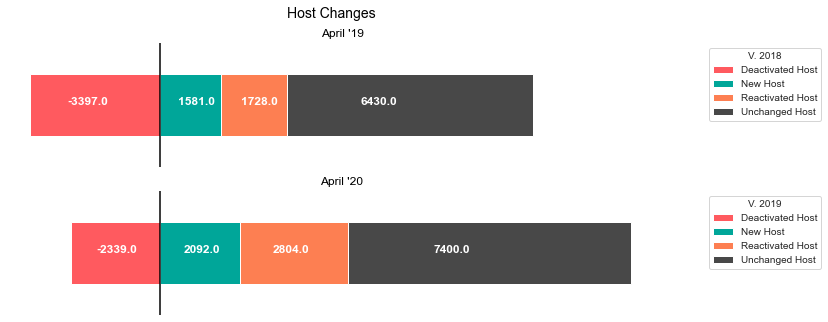

In [36]:
#Colors ["#767676", "#FC642D", "#FF5A5F", "#00A699", "#484848"]

fig, ax = plt.subplots(2,1,figsize=(12,5))
fig.suptitle("Host Changes", fontsize=14)
sns.set_style("white")
colors = LinearSegmentedColormap.from_list("", ["#FF5A5F","#00A699",(0.9903065451532727, 0.4991714995857498, 0.3214581607290803),"#484848"])

sns.despine(bottom=True ,left=True, right=True, top=True)
bplt = host_1819.set_index('host_type').T.plot.barh(ax=ax[0],stacked=True,colormap=colors)

sumheight=0
offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}
for p in bplt.patches:
    height = p.get_width()
    sumheight+= height-height if height<0 else height
    bplt.text((1.01*sumheight)-(height/-1.4 if height<0 else height/1.4),
                p.get_y()+ p.get_height()*offset['center'],'{}'.format(height),
                size=12,fontweight='bold',color="white")
for item in bplt.get_xticklabels():
    item.set_size(10)
for item in bplt.get_yticklabels():
    item.set_size(10)

ax[0].axvline(x=0, color='k')
ax[0].set_xlabel("",size=14)
ax[0].set_title("April '19",size=12)
ax[0].set_xlim(-4000,13500)
x_axis = ax[0].axes.get_xaxis()
x_axis.set_visible(False)
y_axis = ax[0].axes.get_yaxis()
y_axis.set_visible(False)
ax[0].legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=10,title="V. 2018")

bplt2 = host_1920.set_index('host_type').T.plot.barh(ax=ax[1],stacked=True,colormap=colors)
sumheight=0
offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}
for p in bplt2.patches:
    height = p.get_width()
    sumheight+= height-height if height<0 else height
    bplt2.text((1.01*sumheight)-(height/-1.4 if height<0 else height/1.4),
                p.get_y()+ p.get_height()*offset['center'],'{}'.format(height),
                size=12,fontweight='bold',color="white")
for item in bplt2.get_xticklabels():
    item.set_size(10)
for item in bplt2.get_yticklabels():
    item.set_size(10)

ax[1].axvline(x=0, color='k')
ax[1].set_xlabel("",size=14)
ax[1].set_title("April '20",size=12)
ax[1].set_xlim(-4000,13500)
x_axis = ax[1].axes.get_xaxis()
x_axis.set_visible(False)
y_axis = ax[1].axes.get_yaxis()
y_axis.set_visible(False)
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=10,title="V. 2019")

plt.savefig('../output/host-changes-19-20.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [37]:
for axis in ax:
    print(type(axis))

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


## How property prices have changed?

In [38]:
# Join on id, property and room type since a property change the room offer
year1920 = lst19_red[['id','property_type','room_type','price']].\
    merge(lst20_red[lst20_red['recent_bkg_6m']==1][['id','property_type','room_type','price']], 
          on=['id','property_type','room_type'], how='inner')
year1920 = year1920.rename(columns={'price_x':'price_anio1','price_y':'price_anio2'})
year1920.shape

(7652, 5)

In [39]:
(year1920.id.value_counts().to_frame()>1).id.value_counts()
(year1920.property_type.value_counts()/year1920.shape[0]*100).round(2).\
    to_frame().reset_index().rename(columns={'index':'property','property_type':'percentage'}).head(10)

,property,percentage
0,Apartment,87.48
1,Loft,4.51
2,House,3.08
3,Condominium,2.39
4,Serviced apartment,0.84
5,Bed and breakfast,0.39
6,Hostel,0.27
7,Guest suite,0.24
8,Townhouse,0.21
9,Other,0.17


In [40]:
# Focus analysis on the property types with more properties

topPropertyTypes = (year1920.property_type.value_counts()/year1920.shape[0]*100).\
    to_frame().reset_index().rename(columns={'property_type':'percent','index':'property_type'})
topPropertyTypesLst = list(topPropertyTypes[topPropertyTypes['percent']>=1].property_type)
topPropertyTypesLst

['Apartment', 'Loft', 'House', 'Condominium']

In [41]:
# Check if currency is the same for properties.

year1920.price_anio1.str.slice(stop=1).value_counts()
year1920.price_anio2.str.slice(stop=1).value_counts()

# Currency is the same

$    7652
Name: price_anio2, dtype: int64

In [42]:
expCastInt = lambda x: float(x)

def convertImport(data):
    expCastInt = lambda x: float(x)
    
    data = data.str.replace(r'(\$|\,)+','', regex=True).apply(expCastInt)
    
    return data

year1920[['price_anio1','price_anio2']] = year1920[['price_anio1','price_anio2']].apply(convertImport,axis=1)

In [43]:
# Categorización

def catPrices(df):
    val = ''
        
    if df.price_anio1==df.price_anio2:
        val = "Same Price" 
    elif df.price_anio1<df.price_anio2:
        val = "Price Increased" 
    elif df.price_anio1>df.price_anio2:
        val = "Price Drop" 
    else:
        val = 'Uncategorized'
    return val

In [44]:
year1920["price_category"] = year1920.apply(catPrices, axis=1)

In [45]:
year1920_pct = (year1920.price_category.value_counts()/year1920.shape[0]*100).round(2).\
    to_frame().reset_index().rename(columns={"price_category":"percentage","index":"category"})
year1920_pct

,category,percentage
0,Same Price,51.91
1,Price Increased,30.87
2,Price Drop,17.22


In [46]:
year1920_top_prop = year1920[year1920.property_type.isin(topPropertyTypesLst)]
tbl = pd.pivot_table(year1920_top_prop, index=['property_type', 'price_category'], values=['price_anio1'],
                    aggfunc={'price_anio1':'count'})
tbl["percent"]=(tbl.price_anio1 / tbl.groupby(level=0).price_anio1.transform(sum) * 100).round(1)
tbl = tbl.reset_index().sort_values('percent', ascending=False)

<Figure size 432x288 with 0 Axes>

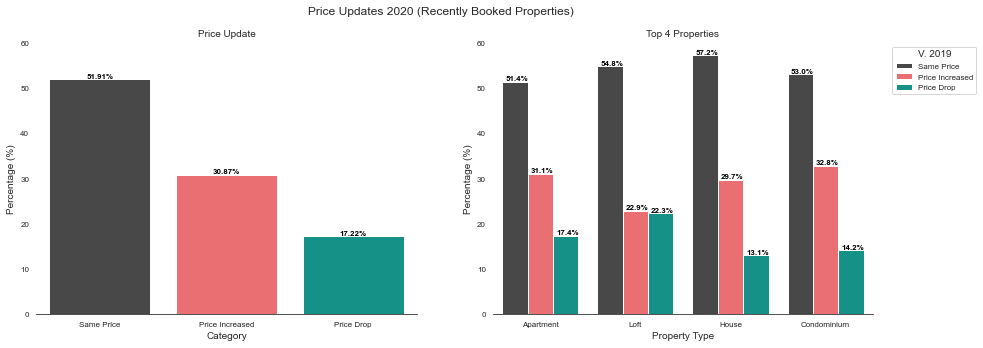

In [47]:
#Colors ["#767676", "#FC642D", "#FF5A5F", "#00A699", "#484848"]

corp = ["#484848", "#FF5A5F", "#00A699", "#00A699", "#767676"]
colors = sns.light_palette("#FC642D", reverse=True)

plt.figure()
plt.subplots(2,2, figsize=(15,5))
plt.subplot(1,2,1)
sns.set_style("white")
cht1 = sns.barplot(x='category',y='percentage',data=year1920_pct, palette=corp)
for p in cht1.patches:
    cht1.annotate(str(p.get_height())+'%', (p.get_x()+0.4, p.get_height()),
                   ha='center', va='bottom',
                   size = 8,color= 'black',fontweight='bold')
for item in cht1.get_xticklabels():
    item.set_size(8)
for item in cht1.get_yticklabels():
    item.set_size(8)
sns.despine(left=True, right=True, top=True)

plt.xlabel("Category",size=10)
plt.ylabel("Percentage (%)",size=10)
plt.ylim(0,60)
plt.title("Price Update",size=10)

plt.subplot(1,2,2)
sns.set_style("white")

bplot = sns.barplot(x='property_type',y='percent',hue="price_category",data=tbl, 
            palette=corp,order=topPropertyTypesLst)

for p in bplot.patches:
    bplot.annotate('{}'.format(p.get_height())+'%', (p.get_x()+0.15, p.get_height()),
                   ha='center', va='bottom',
                   size = 8,color= 'black',fontweight='bold')

for item in bplot.get_xticklabels():
    item.set_size(8)
for item in bplot.get_yticklabels():
    item.set_size(8)
sns.despine(left=True, right=True, top=True)

plt.xlabel("Property Type",size=10)
plt.ylabel("Percentage (%)",size=10)
plt.ylim(0,60)
plt.title("Top %s Properties" %len(topPropertyTypesLst),size=10)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=8,title="V. 2019")
plt.suptitle("Price Updates 2020 (Recently Booked Properties)",size=12)

plt.savefig('../output/price_updates-2020.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [48]:
(year1920[year1920.loc[:,"property_type"]=='Apartment'].groupby("room_type")["room_type"].size()/year1920.shape[0]*100).to_frame()\
.rename(columns={"room_type":"pct"}).\
reset_index().sort_values('pct',ascending=False).head(5)

,room_type,pct
0,Entire home/apt,67.799268
1,Private room,19.380554
2,Shared room,0.300575


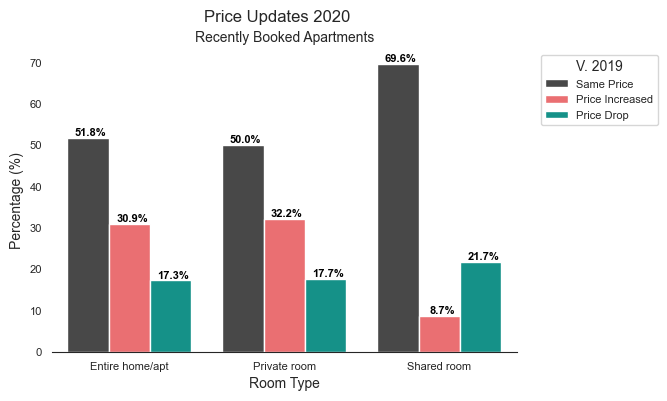

In [49]:
tbl2 = pd.pivot_table(year1920[year1920.property_type=='Apartment'], index=['room_type', 'price_category'], values=['price_anio1'],
                    aggfunc={'price_anio1':'count'})
tbl2["percent"]=(tbl2.price_anio1 / tbl2.groupby(level=0).price_anio1.transform(sum) * 100).round(1)
tbl2 = tbl2.reset_index().sort_values('percent', ascending=False)

topRoomTypes = (year1920.room_type.value_counts()/year1920.shape[0]*100).\
    to_frame().reset_index().rename(columns={'room_type':'percent','index':'room_type'})
topRoomTypesLst = list(topRoomTypes.room_type)
topRoomTypesLst

corp = ["#484848", "#FF5A5F", "#00A699", "#00A699", "#767676"]

plt.figure(dpi=100)
sns.set_style("white")
plt.suptitle("Price Updates 2020",size=12)
plt.title("Recently Booked Apartments",size=10)

bplot = sns.barplot(x='room_type',y='percent',hue="price_category",data=tbl2, 
            palette=corp, order=topRoomTypesLst)

for p in bplot.patches:
    bplot.annotate('{}'.format(p.get_height())+'%', (p.get_x()+0.15, p.get_height()),
                   ha='center', va='bottom',
                   size = 8,color= 'black',fontweight='bold')

for item in bplot.get_xticklabels():
    item.set_size(8)
for item in bplot.get_yticklabels():
    item.set_size(8)
sns.despine(left=True, right=True, top=True)

plt.xlabel("Room Type",size=10)
plt.ylabel("Percentage (%)",size=10)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=8,title="V. 2019")
plt.savefig('../output/price_updates_apartments-2020.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Are there more rooms available?

In [50]:
availability = lst18_red[lst18_red['recent_bkg_6m']==1].loc[:,['id','availability_365']].rename(columns={'availability_365':'2018'}).\
    merge(lst19_red[lst19_red['recent_bkg_6m']==1].loc[:,['id','availability_365']], how='outer').rename(columns={'availability_365':'2019'}).\
    merge(lst20_red[lst20_red['recent_bkg_6m']==1].loc[:,['id','availability_365']], how='outer').rename(columns={'availability_365':'2020'})
availability.describe()

,2018,2019,2020
count,11168.000000,11529.000000,12905.000000
mean,181.824857,166.083702,183.881906
std,121.256246,119.315865,131.489079
min,0.000000,0.000000,0.000000
25%,69.000000,55.000000,74.000000
50%,171.000000,149.000000,176.000000
75%,303.000000,284.000000,323.000000
max,365.000000,365.000000,365.000000


In [51]:
availability = availability.loc[:,['2018','2019','2020']].\
    unstack().to_frame().reset_index().\
    rename(columns={0:'availability','level_0':'year'}).\
    drop('level_1',axis=1).dropna(subset=['availability'])

availability.head(1)

,year,availability
0,2018,307.0


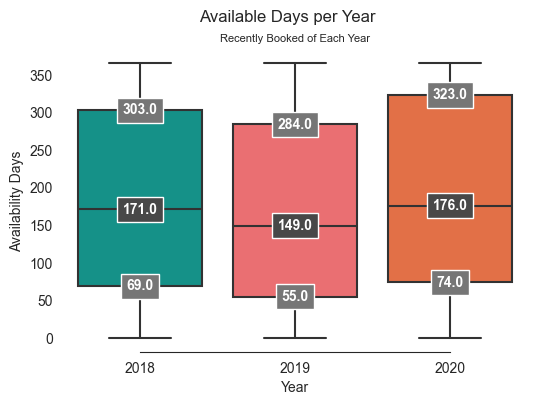

In [52]:
corp = ["#00A699", "#FF5A5F", "#FC642D","#767676", "#484848"]

f, ax = plt.subplots(dpi=100)
sns.set_style("white")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="year", y="availability", data=availability, palette=corp)

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    p25 = round(lines[0+cat*6].get_ydata()[0],1) 
    p50 = round(lines[4+cat*6].get_ydata()[0],1) 
    p75 = round(lines[1+cat*6].get_ydata()[0],1) 

    ax.text(cat,p25,f'{p25}',ha='center',va='center', 
        fontweight='bold',size=10,color='white',
        bbox=dict(facecolor="#767676"))
    ax.text(cat,p50,f'{p50}',ha='center',va='center', 
        fontweight='bold',size=10,color='white',
        bbox=dict(facecolor="#484848"))
    ax.text(cat,p75,f'{p75}',ha='center',va='center', 
        fontweight='bold',size=10,color='white',
        bbox=dict(facecolor="#767676"))
    
    
ax.set_ylabel("Availability Days")
ax.set_xlabel("Year",size=10)

plt.suptitle("Available Days per Year",size=12)
plt.title("Recently Booked of Each Year",size=8)

sns.despine(trim=True, left=True)

plt.savefig('../output/availability_days-2020.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()